In [1]:
from itertools import chain

import numpy as np
import pandas as pd

from utils import ldZipPkl

from plot_utils import setDefault

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import clear_output

sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 16})

In [2]:
#setDefault(figsize=(20,10))
current_palette = sns.color_palette('pastel', 6)

In [3]:
mc_results = ldZipPkl("stop_choices/mc_sc.pkl")
mc_results_long = [[i]* mc_results[i] for i in range(len(mc_results))]

sarsa_results = ldZipPkl("stop_choices/s_sc.pkl")
sarsa_results_long = [[i]* sarsa_results[i] for i in range(len(sarsa_results))]

q_results = q_results = ldZipPkl("stop_choices/q_sc.pkl")
q_results_long = [[i]* q_results[i] for i in range(len(q_results))]

dq_results = ldZipPkl("stop_choices/dqa_sc.pkl")
dq_results_long = [[i]* dq_results[i] for i in range(len(dq_results))]

rule_results = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 474, 481, 402, 366, 328, 338, 275, 276, 261, 197, 199, 189, 175, 176, 160, 189, 150, 141, 150, 125, 116, 111, 111, 106, 107, 74, 90, 81, 94, 84, 3973]
rule_results_long = [[i]* rule_results[i] for i in range(len(rule_results))]

res_df = pd.DataFrame({"mc_idx":list(chain(*mc_results_long)),
                      "sarsa_idx":list(chain(*sarsa_results_long)),
                      "q_idx":list(chain(*q_results_long)),
                      "dq_idx":list(chain(*dq_results_long)),
                      "rule_idx":list(chain(*rule_results_long))})

res_df_long = pd.melt(res_df, var_name='agent', value_name='idx')

In [4]:
agent_names = ["MCMC", "SARSA", "Q-learning", "Deep Q-learning", "Rule"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


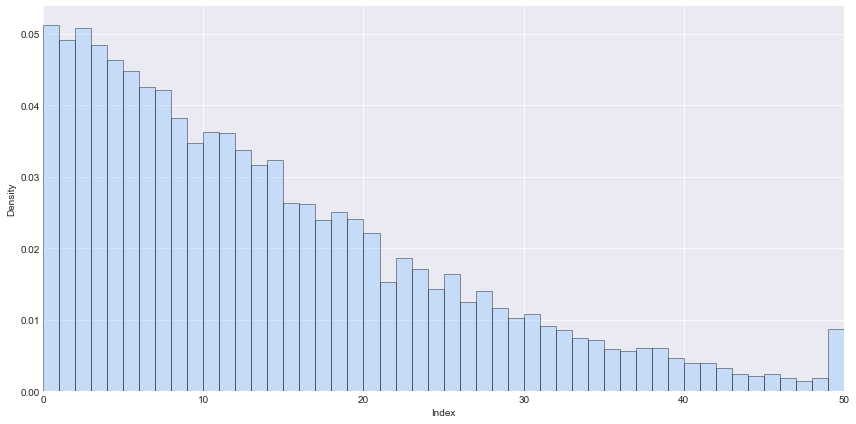

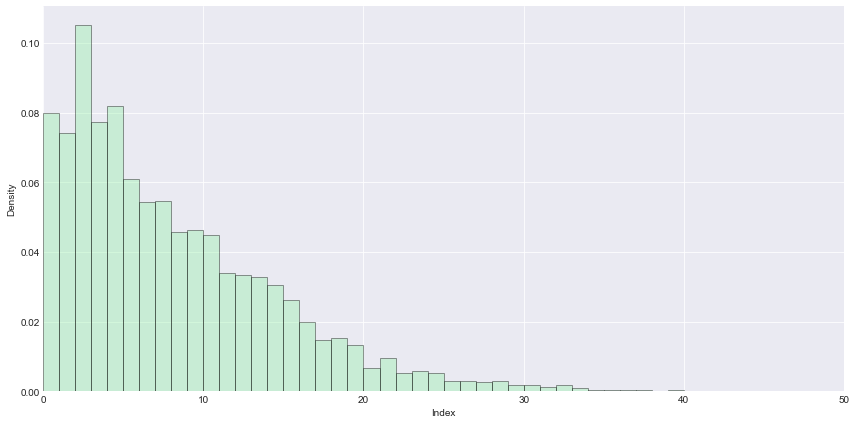

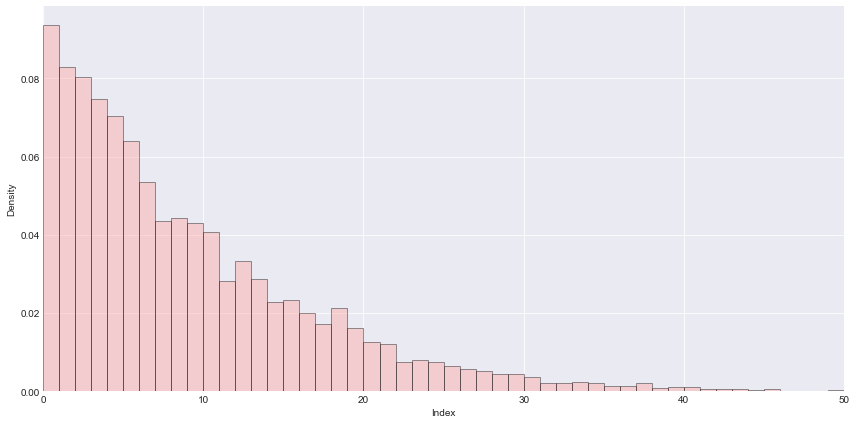

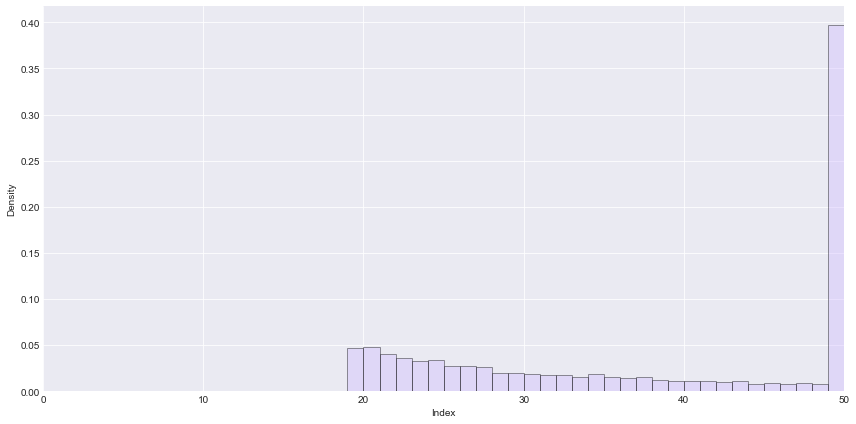

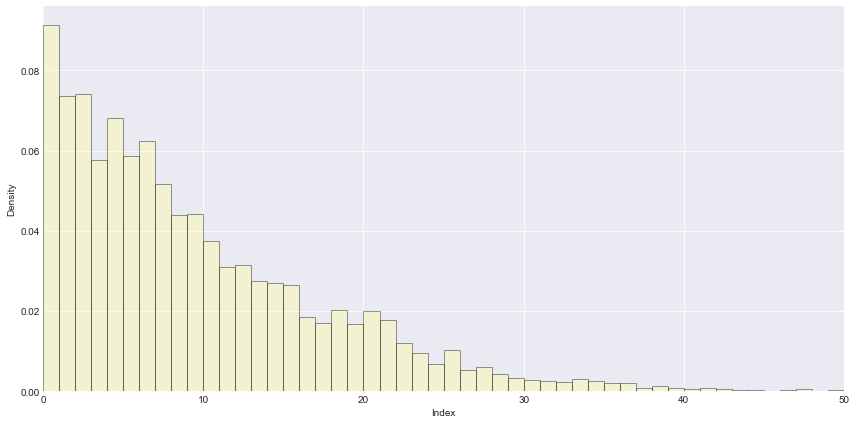

In [5]:
for i, col in enumerate(res_df):
    fig = plt.figure(figsize=(12,6))
    sns.distplot(res_df[col], 
                 hist=True, 
                 kde=False, 
                 norm_hist=True, 
                 bins=np.arange(0,51),
                 color=current_palette[i],
                 hist_kws={'edgecolor':'black'}, 
                 label=agent_names[i],
                 axlabel='Index')
    plt.xlim((0, 50))
    plt.xlabel("Index")
    plt.ylabel("Density")
    fig.tight_layout()
    fig.savefig("viz/hist/{}_agent.png".format(col.split("_")[0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


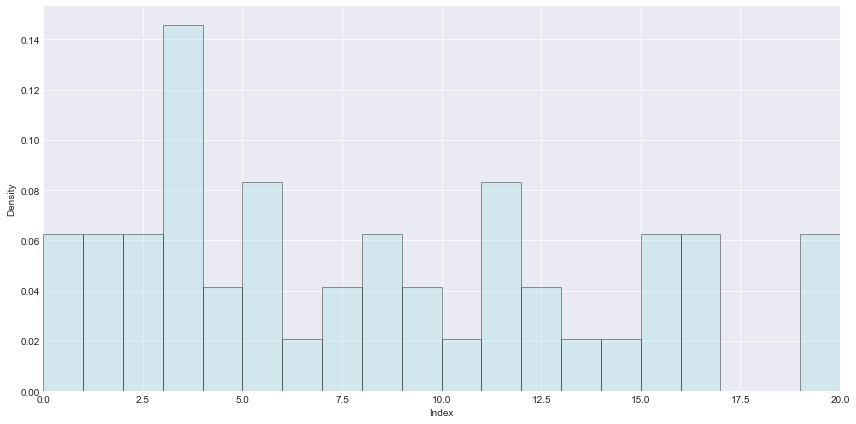

In [6]:
human_results = [3, 3, 3, 7, 2, 4, 1, 2, 3, 2, 1, 4, 2, 1, 1, 3, 3, 0, 0, 3]
human_results_long = [[i]* human_results[i] for i in range(len(human_results))]

fig = plt.figure(figsize=(12,6))
sns.distplot(list(chain(*human_results_long)), 
             hist=True, 
             kde=False, 
             norm_hist=True, 
             bins=np.arange(0,21),
             color=current_palette[5],
             hist_kws={'edgecolor':'black'}, 
             label="Human",
             axlabel='Index')
plt.xlim((0, 20))
plt.xlabel("Index")
plt.ylabel("Density")
fig.tight_layout()
fig.savefig("viz/hist/human_agent.png")

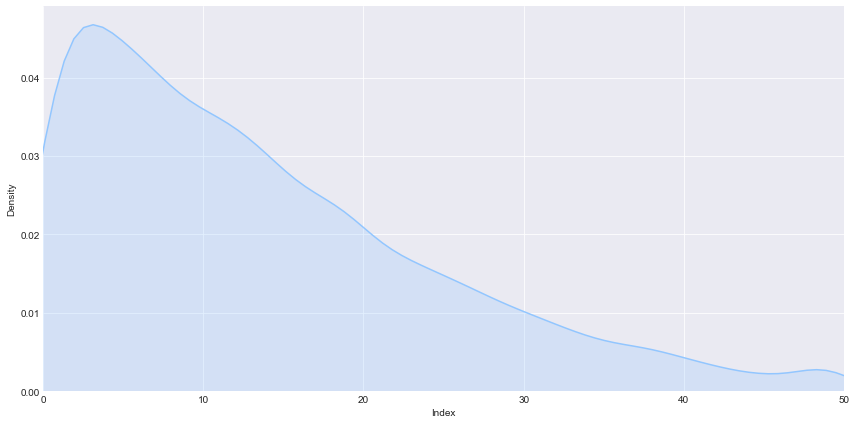

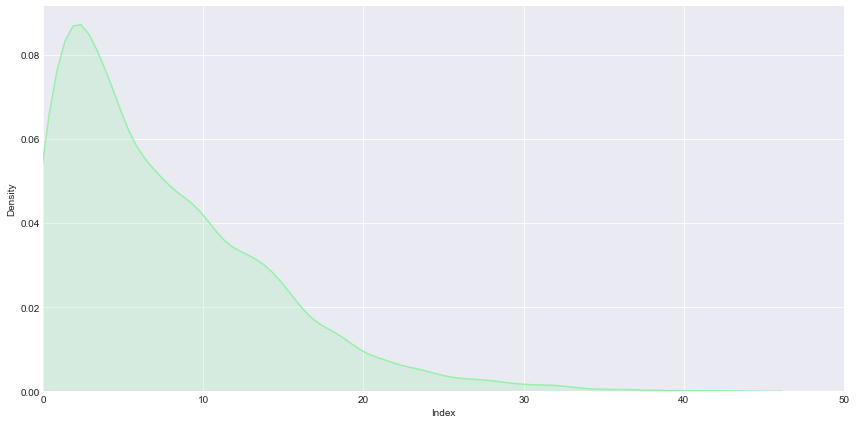

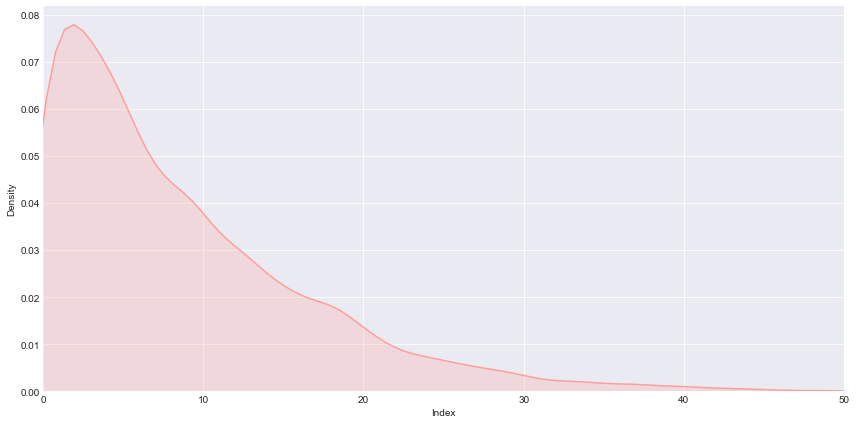

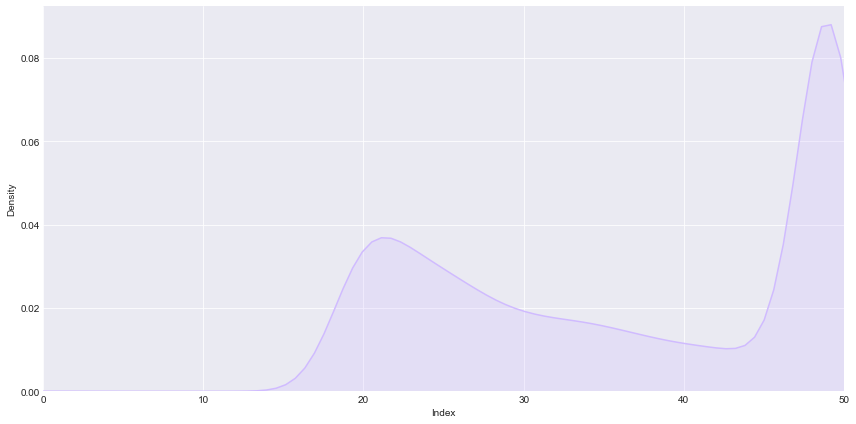

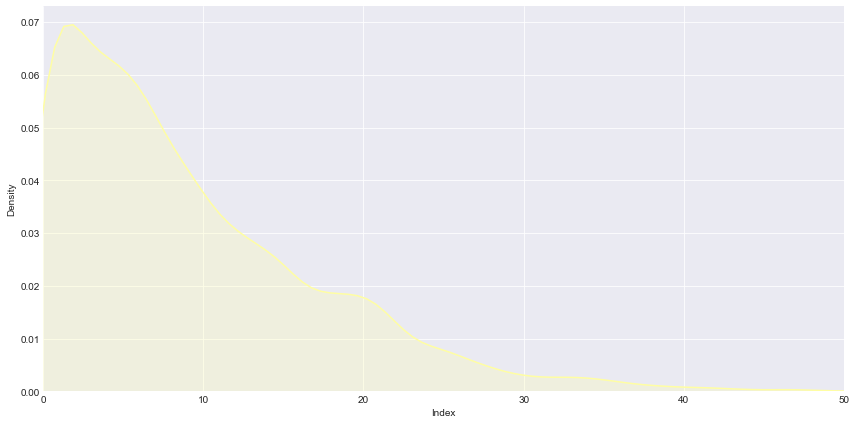

In [7]:

#fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)

for i, col in enumerate(res_df):
    fig = plt.figure(figsize=(12,6))
    sns.distplot(res_df[col], 
                 hist=False,
                 bins=np.arange(0,51),
                 color=current_palette[i],
                 kde_kws={'shade':True}, 
                 axlabel='Index')
    plt.xlim((0, 50))
    plt.xlabel("Index")
    plt.ylabel("Density")
    fig.tight_layout()
    fig.savefig("viz/density/{}_agent.png".format(col.split("_")[0]))

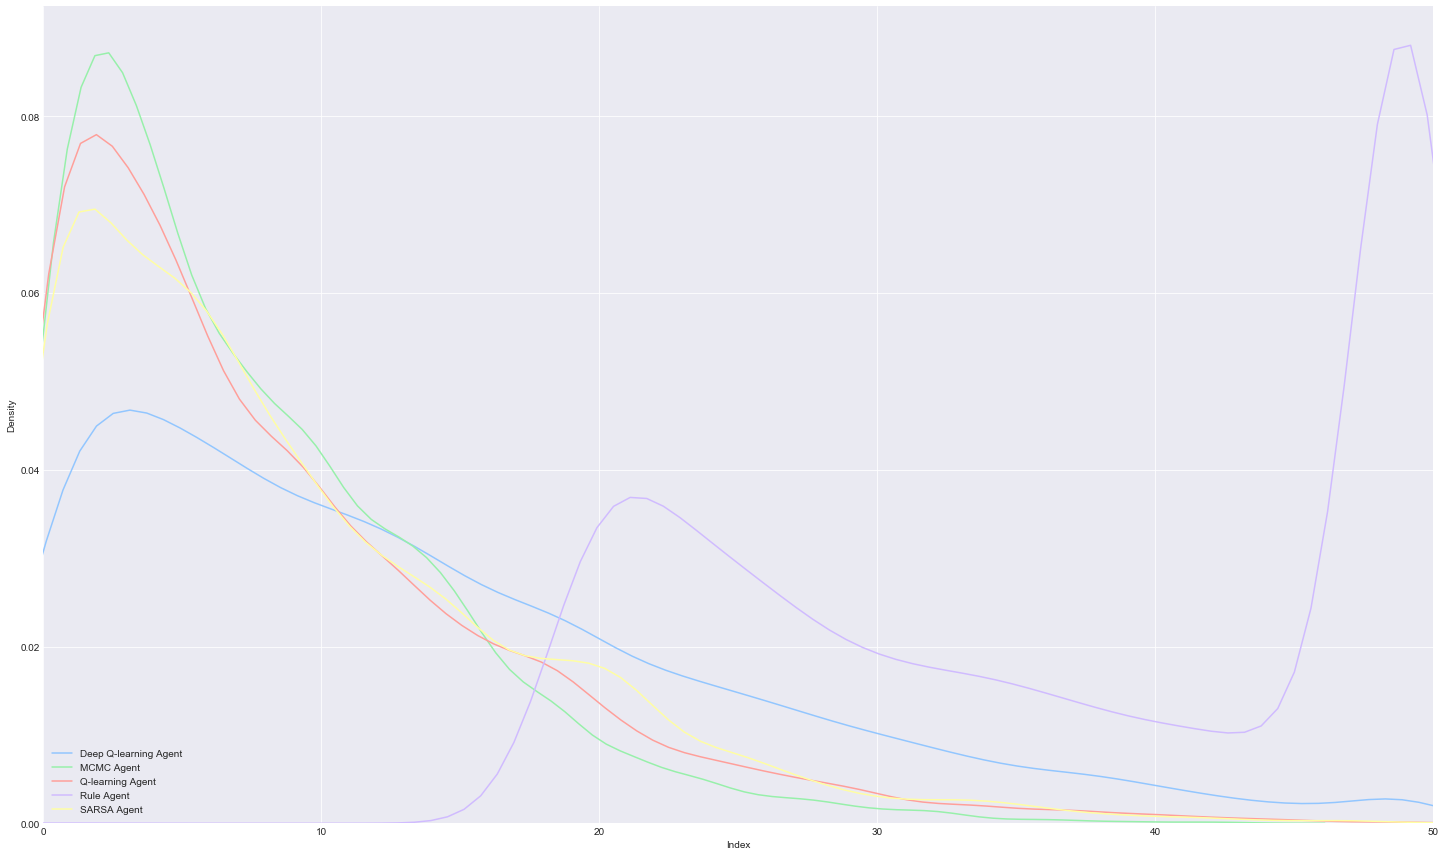

In [9]:
fig = plt.figure(figsize=(20,12))

for i, col in enumerate(res_df):
    if col == "mc_idx":
        label = "MCMC Agent"
    if col == "sarsa_idx":
        label = "SARSA Agent"
    if col == "q_idx":
        label = "Q-learning Agent"
    if col == "dq_idx":
        label = "Deep Q-learning Agent"
    if col == "rule_idx":
        label = "Rule Agent"
    sns.distplot(res_df[col], 
                 hist = False,
                 color=current_palette[i],
                 label=label,
                 axlabel='Index')

plt.xlim((0, 50))
plt.tight_layout()
#plt.title('Final Index Over 10,000 Evaluation Games')
plt.xlabel('Index')
plt.ylabel('Density')
plt.legend()
fig.savefig("viz/density/density_combined.png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


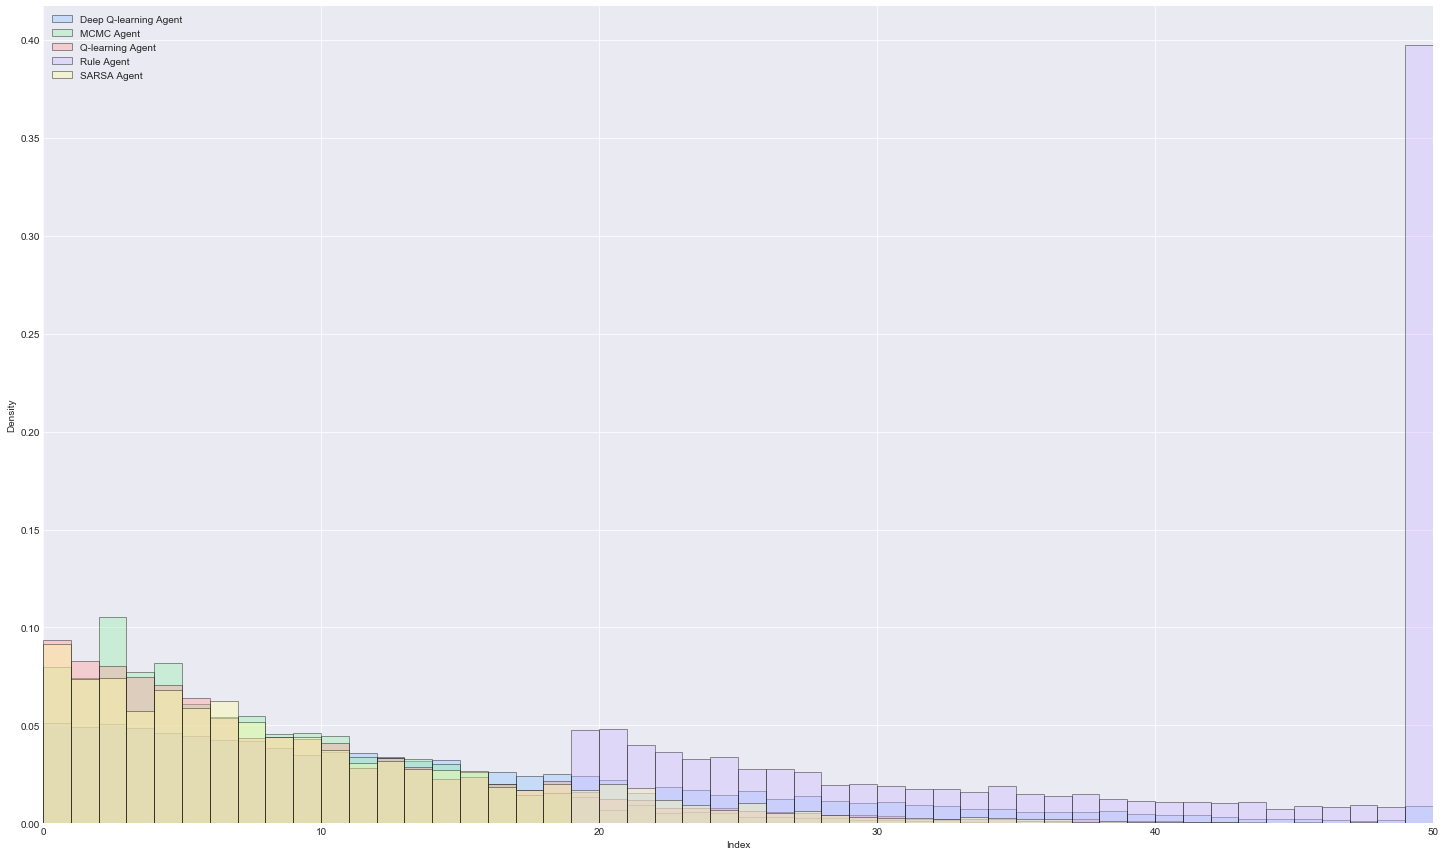

In [11]:
fig = plt.figure(figsize=(20,12))

for i, col in enumerate(res_df):
    if col == "mc_idx":
        label = "MCMC Agent"
    if col == "sarsa_idx":
        label = "SARSA Agent"
    if col == "q_idx":
        label = "Q-learning Agent"
    if col == "dq_idx":
        label = "Deep Q-learning Agent"
    if col == "rule_idx":
        label = "Rule Agent"
    sns.distplot(res_df[col], 
                 hist = True, 
                 kde=False, 
                 norm_hist=True, 
                 bins=np.arange(0,51),
                 color=current_palette[i],
                 label=label,
                 hist_kws={'edgecolor':'black'},
                 axlabel='Index')
    
plt.xlim((0, 50))
plt.tight_layout()
#plt.title('Final Index Over 10,000 Evaluation Games')
plt.xlabel('Index')
plt.ylabel('Density')
plt.legend()
fig.savefig("viz/hist/hist_combined.png")